Assignment: Flowers Recognition
Dataset Description:

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

Attribute Information:
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.
Also explore how to resize images in tensorflow and then resize all the images to a same size.
This is a Multiclass Classification Problem.

WORKFLOW :
Load Data
Split into 60 and 40 ratio.
Encode labels.
Create Model
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)
Train the Model.
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
Prediction should be > 85%
Evaluation Step
Prediction

Data :
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing


In [91]:
import os
import pandas as pd
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.lib.io import file_io
from datetime import datetime
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from PIL import Image

In [92]:
val_batch = 10
train_batch = 32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.30,
        )
train_generator = train_datagen.flow_from_directory(
        './data',
        target_size=(80, 80),
        batch_size=train_batch,
        class_mode='categorical',
        subset = 'training',
        color_mode = 'grayscale',
        shuffle = True,
        )
validation_generator = train_datagen.flow_from_directory(
        './data',
        target_size=(80, 80),
        batch_size=val_batch,
        class_mode='categorical',
        subset = 'validation',
        color_mode = 'grayscale',
        shuffle= True)


Found 3028 images belonging to 5 classes.
Found 1295 images belonging to 5 classes.


In [93]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [94]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [95]:
type(train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [96]:
train_generator[31][1].shape


(32, 5)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
model = Sequential()
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5,  activation='softmax'))

In [98]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [99]:

import tensorflow as tf

In [100]:
with tf.device('/device:GPU:0'):
    result = model.fit(
          train_generator,
          steps_per_epoch =25,
          batch_size = train_batch,
          validation_data = validation_generator,
          validation_batch_size= val_batch,
          epochs=25)

Epoch 1/25
25/25 [==============================] - 6s 257ms/step - loss: 1.8380 - accuracy: 0.2075 - val_loss: 1.6081 - val_accuracy: 0.2463
Epoch 2/25
25/25 [==============================] - 6s 249ms/step - loss: 1.6093 - accuracy: 0.2375 - val_loss: 1.6073 - val_accuracy: 0.2456
Epoch 3/25
25/25 [==============================] - 6s 258ms/step - loss: 1.6072 - accuracy: 0.2325 - val_loss: 1.6062 - val_accuracy: 0.2456
Epoch 4/25
25/25 [==============================] - 6s 246ms/step - loss: 1.6061 - accuracy: 0.2438 - val_loss: 1.6053 - val_accuracy: 0.2456
Epoch 5/25
25/25 [==============================] - 7s 261ms/step - loss: 1.6134 - accuracy: 0.2562 - val_loss: 1.6044 - val_accuracy: 0.2432
Epoch 6/25
25/25 [==============================] - 6s 253ms/step - loss: 1.6044 - accuracy: 0.2537 - val_loss: 1.6037 - val_accuracy: 0.2448
Epoch 7/25
25/25 [==============================] - 7s 263ms/step - loss: 1.6063 - accuracy: 0.2259 - val_loss: 1.6034 - val_accuracy: 0.2432
Epoch 

In [101]:
model.evaluate(validation_generator)

130/130 [==============================] - 4s 34ms/step - loss: 1.5993 - accuracy: 0.2432


[1.5993447303771973, 0.2432432472705841]

In [102]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

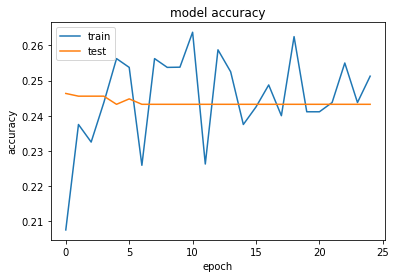

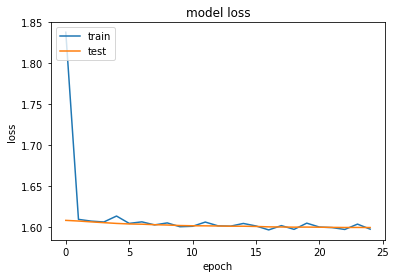

In [103]:

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [111]:
y_pred1 = model.predict(validation_generator)

In [105]:
y_pred1.shape

(1295, 5)

In [106]:
list1 = []
for i in range(0,len(validation_generator)):
    for j in range(0,val_batch):
        try:
              list1.append(validation_generator[i][1][j].tolist())
        except:
              break

In [107]:
np.argmax(y_pred1, axis=1)[0:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [108]:
np.argmax(list1[0:30],axis=1)

array([1, 4, 2, 1, 2, 1, 1, 0, 4, 3, 2, 1, 1, 2, 4, 2, 1, 0, 1, 4, 2, 4,
       1, 1, 1, 4, 0, 4, 2, 4], dtype=int64)

In [110]:
len(list1)

1295